# Exact Zonos vs Overapproximated Zonos
In Commit `d42d898` we try to analyse the potential influence of Overapproximation on the performance.
In particular, we compute the number of *actual* splits that were overapproximated for a given Zonotope.

We do this through the following procedure:
- Prove equivalence using CEGAR procedure
- For each overapproximated Zonotope for which we proved equivalence:
    - Redecend into this node and execute exact splitting from there on
- For each Zonotope return a tuple consiting of:
    - a: Splits made
    - b: Number of nodes claimed to be overapproximated
    - c: Actual number of Zonotopes aggregated within the overapproximation

Note that `log2(c)` represents an approximate of the number of overapproximated *actual* splits

In [1]:
import parse
import analyse
import matplotlib.pyplot as plt
import numpy as np

In [4]:
benchmarks = [
    "../results/ACASXU_run2a_1_1_batch_2000-trunc-10101-0.05-CEGAR/",
    "../results/ACASXU_run2a_1_2_batch_2000-trunc-10101-0.05-CEGAR/",
    "../results/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05-CEGAR/",
    "../results/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05-CEGAR/",
    "../results/HAR-trunc-1000.1-0.25-CEGAR/",
    "../results/mnist_relu_3_100-trunc-400.1-0.25-CEGAR/",
    "../results/mnist8x8_student_12_12_12_10-9000.5-top-CEGAR/",
    "../results/mnist8x8_student_12_12_12_10-9100.5-top-CEGAR/",
    "../results/mnist8x8_student_24_12_10-9000.5-top-CEGAR/",
    "../results/mnist8x8_student_24_12_10-9100.5-top-CEGAR/",
    "../results/mnist8x8_student_36_10-9000.5-top-CEGAR/",
    "../results/mnist8x8_student_36_10-9100.5-top-CEGAR/"
]

In [5]:
overapprox_vs_exact = {}
for b in benchmarks:
    try:
        overapprox_vs_exact[b]=parse.BenchmarkRun(
            b+"1/nnequiv-d42d898/stdout.log",
            b+"1/nnequiv-d42d898/stderr.log",
            out_handlers=[parse.ExactCounterLine],
            err_handlers=[]
            )
    except FileNotFoundError:
        print(f"Could not find {b}")
        overapprox_vs_exact[b]=None

Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)
Handling ExactCounterLine (may take some time)


First, we analyze the number of exact Zonotopes in comparision to the number of overapproximated Zonotopes:

In [41]:
for b in benchmarks:
    if overapprox_vs_exact[b] is not None:
        overapprox_count = overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0].shape[0]
        exact_count = np.sum(overapprox_vs_exact[b].exact_counter.exact_counter_results[:,2])
        print(b)
        print(f"Overapprox: {overapprox_count} | Exact: {exact_count} | Exact per Overapprox: {exact_count/overapprox_count:.2f}")

../results/ACASXU_run2a_1_1_batch_2000-trunc-10101-0.05-CEGAR/
Overapprox: 1177 | Exact: 10409 | Exact per Overapprox: 8.84
../results/ACASXU_run2a_1_2_batch_2000-trunc-10101-0.05-CEGAR/
Overapprox: 31129 | Exact: 56749 | Exact per Overapprox: 1.82
../results/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05-CEGAR/
Overapprox: 11503 | Exact: 62485 | Exact per Overapprox: 5.43
../results/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05-CEGAR/
Overapprox: 38217 | Exact: 95577 | Exact per Overapprox: 2.50
../results/HAR-trunc-1000.1-0.25-CEGAR/
Overapprox: 1 | Exact: 443 | Exact per Overapprox: 443.00
../results/mnist_relu_3_100-trunc-400.1-0.25-CEGAR/
Overapprox: 1 | Exact: 81 | Exact per Overapprox: 81.00
../results/mnist8x8_student_12_12_12_10-9000.5-top-CEGAR/
Overapprox: 12 | Exact: 3183 | Exact per Overapprox: 265.25
../results/mnist8x8_student_12_12_12_10-9100.5-top-CEGAR/
Overapprox: 1 | Exact: 12294 | Exact per Overapprox: 12294.00
../results/mnist8x8_student_24_12_10-9000.5-top-CEGAR/
Over

For starters we will simply plot over time (i.e Zontope by Zonotope) the number of refinements done before successfully proving equivalence

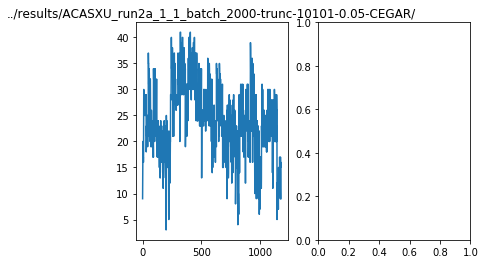

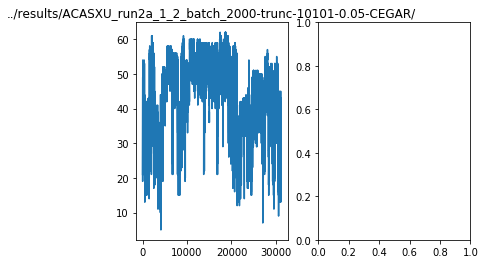

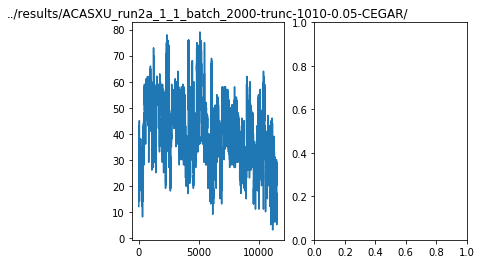

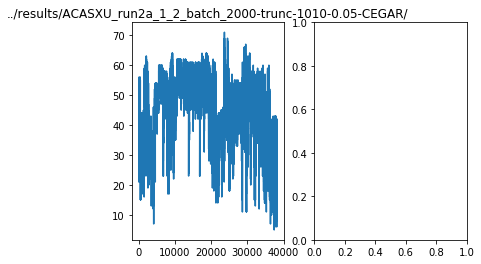

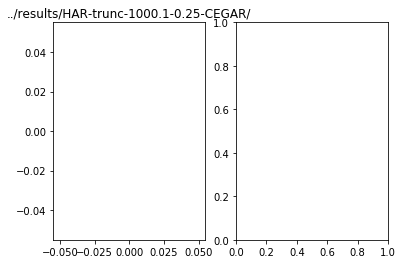

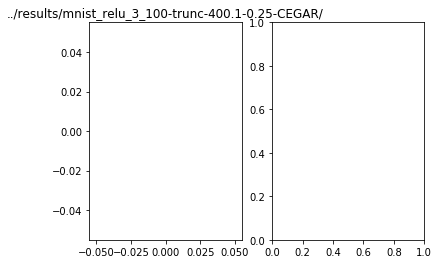

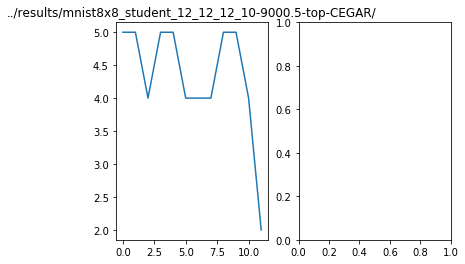

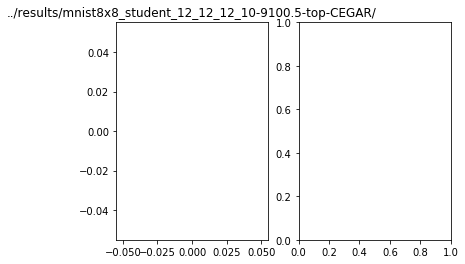

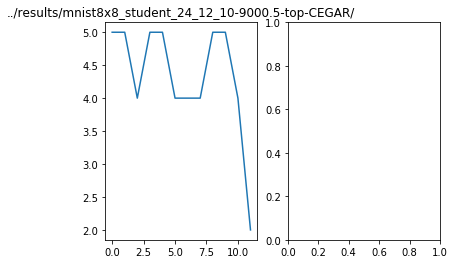

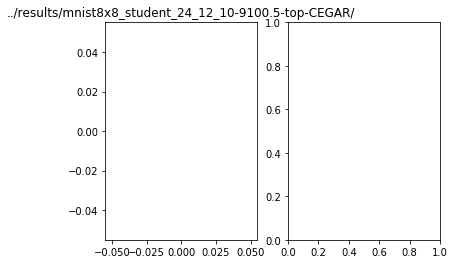

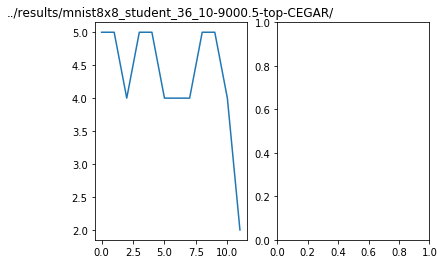

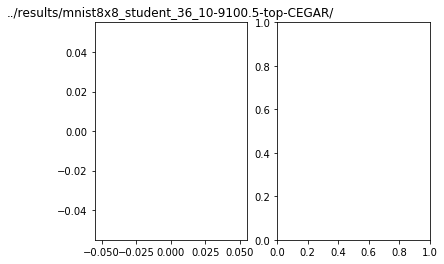

In [11]:
import scipy.signal
def plot_line(data, name):
    x = np.arange(0, data.shape[0], 1)
    fig1, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.plot(x, data)
    if data.shape[0]>201:
        step = data.shape[0]//5
        step = step+1 if step%2 == 0 else step
        #step = 301
        #yhat = scipy.signal.savgol_filter(data, step, 0)
        #ax1.plot(x,yhat)
        #ax1.plot(x,1.2*yhat)
    ax1.set_title(name)
    return ax1, ax2

for b in benchmarks:
    if overapprox_vs_exact[b] is not None:
        fig, _ = plot_line(overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0], b)

Let's have a look at the histograms...

../results/ACASXU_run2a_1_1_batch_2000-trunc-10101-0.05-CEGAR/: Printed
../results/ACASXU_run2a_1_2_batch_2000-trunc-10101-0.05-CEGAR/: Printed
../results/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05-CEGAR/: Printed
../results/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05-CEGAR/: Printed
../results/HAR-trunc-1000.1-0.25-CEGAR/: Printed
../results/mnist_relu_3_100-trunc-400.1-0.25-CEGAR/: Printed
../results/mnist8x8_student_12_12_12_10-9000.5-top-CEGAR/: Printed
../results/mnist8x8_student_12_12_12_10-9100.5-top-CEGAR/: Printed
../results/mnist8x8_student_24_12_10-9000.5-top-CEGAR/: Printed
../results/mnist8x8_student_24_12_10-9100.5-top-CEGAR/: Printed
../results/mnist8x8_student_36_10-9000.5-top-CEGAR/: Printed
../results/mnist8x8_student_36_10-9100.5-top-CEGAR/: Printed


/home/steuber/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


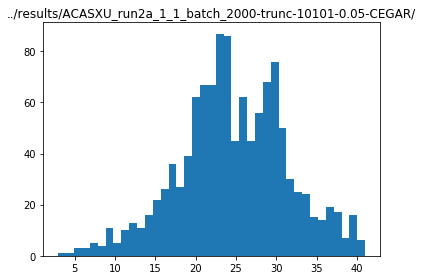

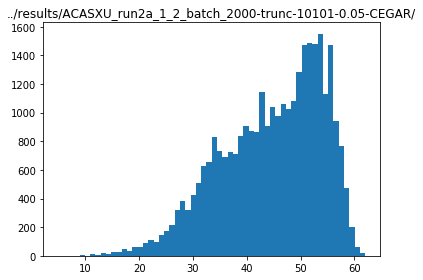

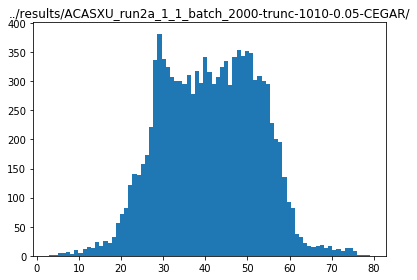

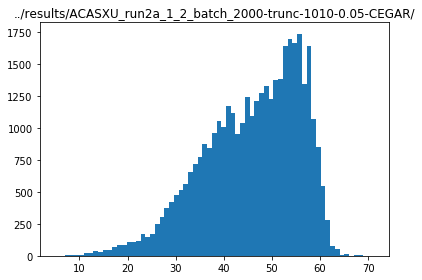

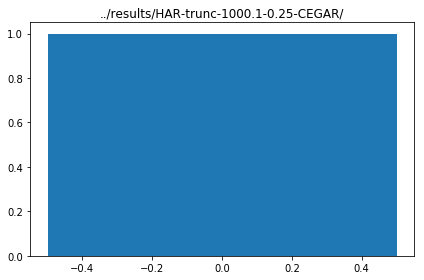

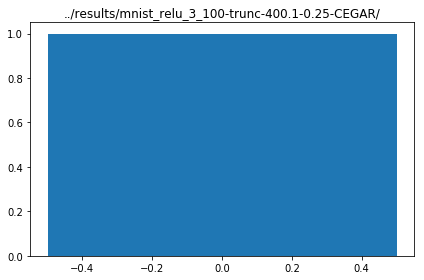

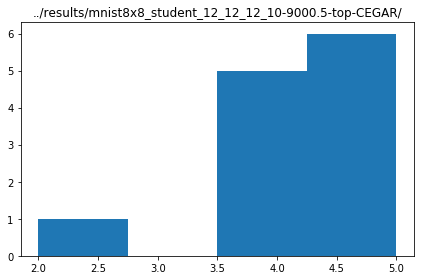

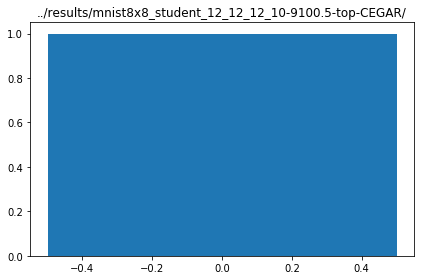

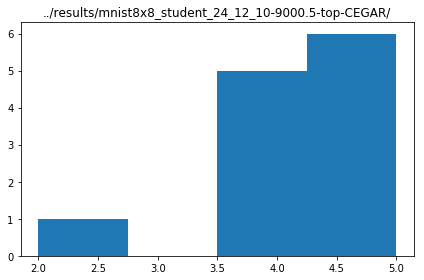

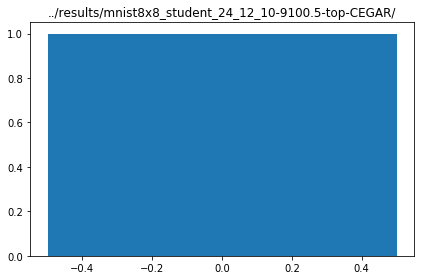

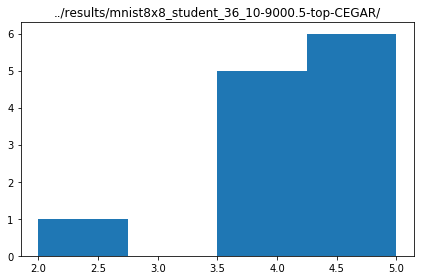

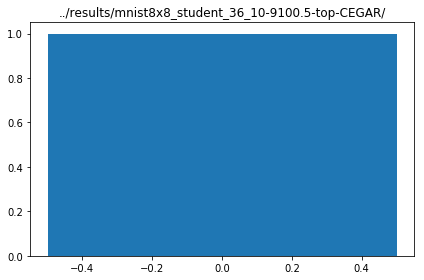

In [16]:
for b in benchmarks:
    print(f"{b}: ",end="")
    if len(overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0])==0:
        print("Skipping...")
        continue
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    data = overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0]
    max_val = max(data)
    min_val = min(data)
    n_bins = max_val-min_val+1

    # We can set the number of bins with the `bins` kwarg
    axs.hist(data, bins=n_bins)
    axs.set_title(b)
    print("Printed")
    nodes = 0.0
    #for s in results[b].equiv_summarization.summarized:
    #    nodes+=2**s
    #print(f"Depth {math.log2(nodes)}, Nodes {nodes}")

../results/ACASXU_run2a_1_1_batch_2000-trunc-10101-0.05-CEGAR/: Window: 300
../results/ACASXU_run2a_1_2_batch_2000-trunc-10101-0.05-CEGAR/: Window: 300
../results/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05-CEGAR/: Window: 300
../results/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05-CEGAR/: Window: 300


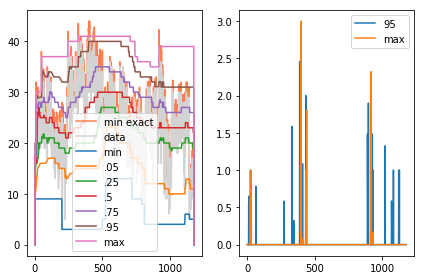

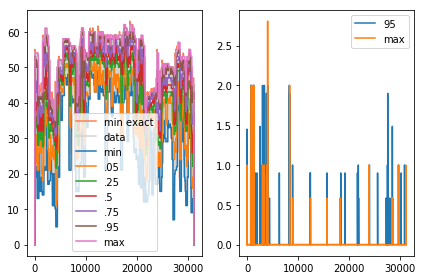

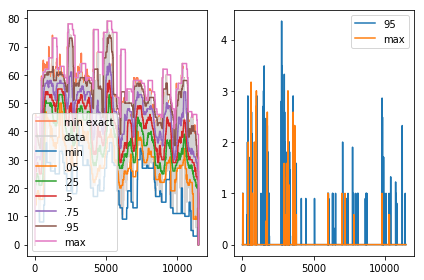

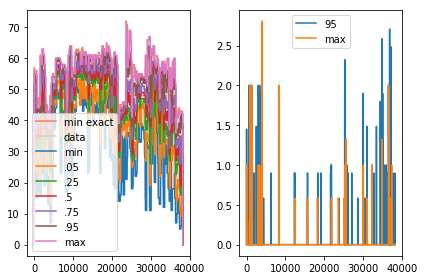

In [40]:
def window_stack(a, width=100):
    n = a.shape[0]
    max_val = np.zeros((n,))
    min_val = np.zeros((n,))
    median = np.zeros((n,))
    percentile_75 = np.zeros((n,))
    percentile_25 = np.zeros((n,))
    percentile_05 = np.zeros((n,))
    percentile_95 = np.zeros((n,))
    for i in range(2,n):
        cur_data = a[max(0,i-width):i-1]
        max_val[i-1] = np.max(cur_data)
        min_val[i-1] = np.min(cur_data)
        median[i-1] = np.percentile(cur_data, 50)
        percentile_75[i-1] = np.percentile(cur_data, 75)
        percentile_25[i-1] = np.percentile(cur_data, 25)
        percentile_95[i-1] = np.percentile(cur_data, 95)
        percentile_05[i-1] = np.percentile(cur_data, 5)
    return max_val, min_val, median, percentile_05, percentile_25, percentile_75, percentile_95

for b in benchmarks[:4]:
    print(f"{b}: ",end="")
    if len(overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0])==0:
        print("Skipping...")
        continue
    fig, (axs1, axs2) = plt.subplots(1, 2, tight_layout=True)
    data = overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0]
    min_exact = overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0] + np.log2(overapprox_vs_exact[b].exact_counter.exact_counter_results[:,2])
    x = np.arange(0, data.shape[0], 1)
    width = 300
    print(f"Window: {width}")
    max_val, min_val, median, percentile_05, percentile_25, percentile_75, percentile_95 = window_stack(data, width=width)
    
    axs1.plot(x, min_exact, label="min exact", color="coral")
    axs1.plot(x, data, label="data",color="lightgray")
    axs1.plot(x, min_val, label="min")
    axs1.plot(x, percentile_05, label=".05")
    axs1.plot(x, percentile_25, label=".25")
    axs1.plot(x, median, label=".5")
    axs1.plot(x, percentile_75, label=".75")
    axs1.plot(x, percentile_95, label=".95")
    axs1.plot(x, max_val, label="max")
    
    #axs2.plot(x, np.clip(min_exact-max_val, 0.0, np.inf)*(np.where(data < max_val,1.0, 0.0)), label="max")
    axs2.plot(x, np.clip(min_exact-percentile_95, 0.0, np.inf)*(np.where(data < percentile_95,1.0, 0.0)), label="95")
    axs2.plot(x, np.clip(min_exact-max_val, 0.0, np.inf)*(np.where(data < max_val,1.0, 0.0)), label="max")
    axs1.legend()
    axs2.legend()

We can now analyse the effect of different strategies...

In [12]:
class Strategy:
    def store_success(self,refine_count):
        pass
    
    def get_next(self):
        pass
    

class MaxStrategy(Strategy):
    def __init__(self):
        self.max = 0
    
    def store_success(self, count):
        self.max = max(self.max, count)
    
    def get_next(self):
        return self.max

class CegarStrategy(Strategy):
    def get_next(self):
        return 0

class AvgStrategy(Strategy):
    def __init__(self):
        self.avg = 0
        self.n = 1
    
    def store_success(self, count):
        if self.n==0:
            self.n+=1
            self.avg = count
        else:
            self.avg += (count-self.avg)/self.n
            self.n +=1
    
    def get_next(self):
        return np.ceil(self.avg)

class ExpAvgStrategy(Strategy):
    def __init__(self, alpha, lift=1.0):
        self.avg = 0
        self.n = 0
        self.alpha = alpha
        self.lift=lift
    
    def store_success(self, count):
        if self.n==0:
            self.avg = count
            self.n+=1
        else:
            self.avg = self.alpha*count+(1-self.alpha)*self.avg
            self.n +=1
    
    def get_next(self):
        rv = np.ceil(self.lift*self.avg)
        return rv

../results/ACASXU_run2a_1_1_batch_2000-trunc-10101-0.05-CEGAR/
CEGAR final zono count: 29120.0
Max final zono count: 11452.0
Avg final zono count: 11036.0
../results/ACASXU_run2a_1_2_batch_2000-trunc-10101-0.05-CEGAR/
CEGAR final zono count: 1396871.0
Max final zono count: 87823.0
Avg final zono count: 175789.0
../results/ACASXU_run2a_1_1_batch_2000-trunc-1010-0.05-CEGAR/
CEGAR final zono count: 473276.0
Max final zono count: 73619.0
Avg final zono count: 85833.0
../results/ACASXU_run2a_1_2_batch_2000-trunc-1010-0.05-CEGAR/
CEGAR final zono count: 1758419.0
Max final zono count: 133728.0
Avg final zono count: 226715.0
../results/HAR-trunc-1000.1-0.25-CEGAR/
CEGAR final zono count: 1.0
Max final zono count: 1.0
Avg final zono count: 1.0
../results/mnist_relu_3_100-trunc-400.1-0.25-CEGAR/
CEGAR final zono count: 1.0
Max final zono count: 1.0
Avg final zono count: 1.0
../results/mnist8x8_student_12_12_12_10-9000.5-top-CEGAR/
CEGAR final zono count: 52.0
Max final zono count: 28.0
Avg fina

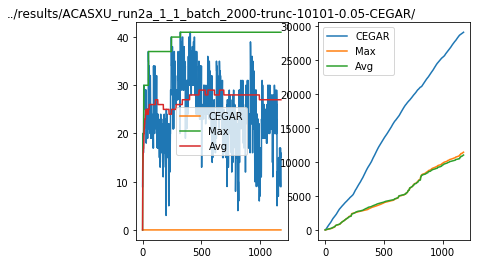

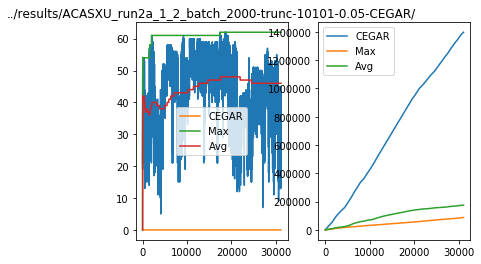

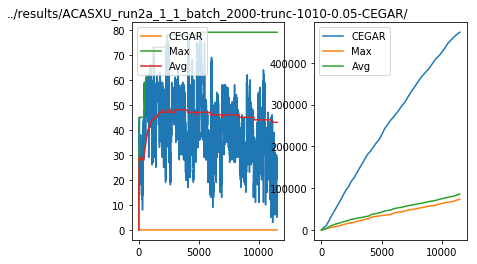

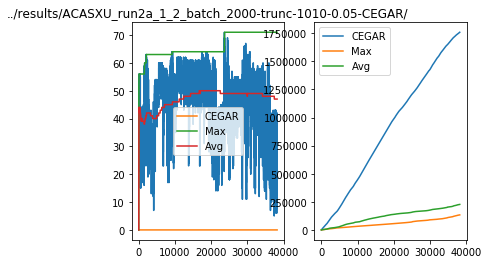

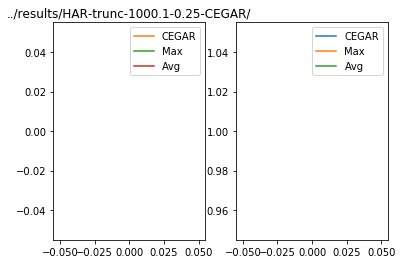

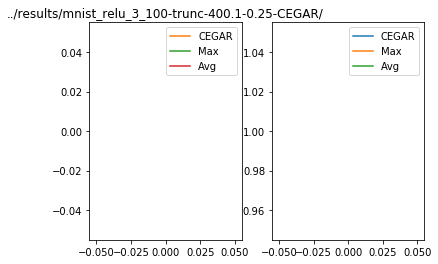

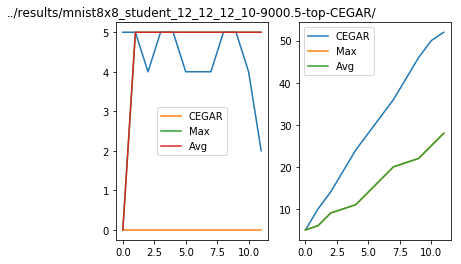

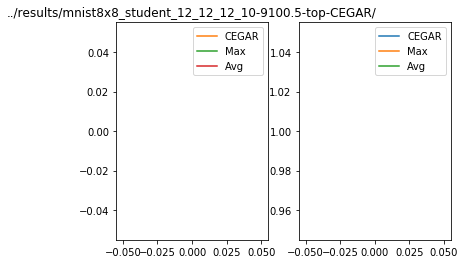

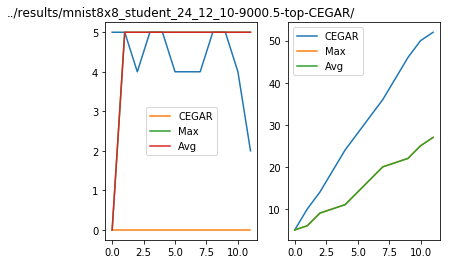

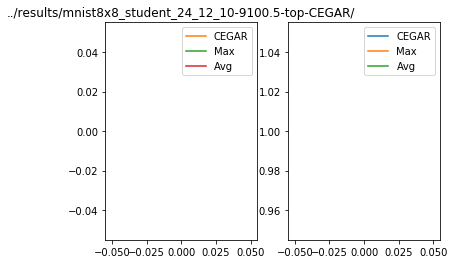

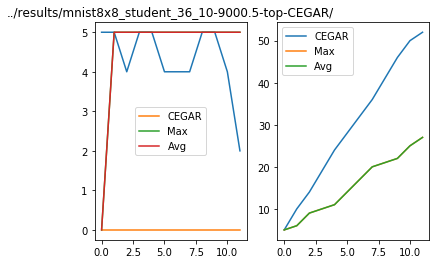

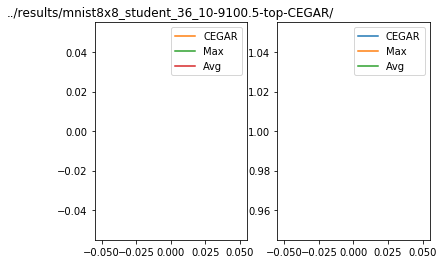

In [13]:
def get_decision(refinement_data, exact_set_data, strat):
    zonos_considered = np.zeros(refinement_data.shape)
    rv = np.zeros(refinement_data.shape)
    for i, (r,e) in enumerate(zip(refinement_data, exact_set_data)):
        rv[i] = strat.get_next()
        if rv[i]==r:
            zono_delta=1
            strat.store_success(r)
        elif rv[i]>r:
            too_exact_refinements = rv[i]-r
            zono_delta=1+min(2**too_exact_refinements, e)
            strat.store_success(min(rv[i],r+np.log2(e)))
        else:
            strat.store_success(r)
            zono_delta=r-rv[i]
        if i>0:
            zonos_considered[i]=zonos_considered[i-1]+zono_delta
        else:
            zonos_considered[0]=zono_delta
    return rv, zonos_considered, zonos_considered[-1]

def plot_decision(fig1, fig2, refine_counts, exact_counts, strat, name):
        y1, y2, count = get_decision(refine_counts, exact_counts, strat)
        x = np.arange(0, refine_counts.shape[0], 1)
        fig1.plot(x,y1, label=name)
        fig2.plot(x,y2, label=name)
        fig1.legend()
        fig2.legend()
        print(f"{name} final zono count: {count}")

for b in benchmarks:
    if overapprox_vs_exact[b] is not None:
        print(b)
        #b =  "../results/ACASXU_run2a_1_1_batch_2000-trunc-10101-0.05-CEGAR/"
        refine_counts = overapprox_vs_exact[b].exact_counter.exact_counter_results[:,0]
        exact_counts = overapprox_vs_exact[b].exact_counter.exact_counter_results[:,2]
        fig1, fig2 = plot_line(refine_counts, b)
        plot_decision(fig1, fig2, refine_counts, exact_counts, CegarStrategy(), "CEGAR")
        plot_decision(fig1, fig2, refine_counts, exact_counts, MaxStrategy(), "Max")
        plot_decision(fig1, fig2, refine_counts, exact_counts, AvgStrategy(), "Avg")
        #plot_decision(fig1, fig2, refine_counts, ExpAvgStrategy(0.01), "ExpAvg-0.01")
        #plot_decision(fig1, fig2, refine_counts, exact_counts, ExpAvgStrategy(0.1), "ExpAvg-0.1")
        #plot_decision(fig1, fig2, refine_counts, exact_counts, ExpAvgStrategy(0.4), "ExpAvg-0.4")
        #plot_decision(fig1, fig2, refine_counts, exact_counts, ExpAvgStrategy(0.7), "ExpAvg-0.7")
        #plot_decision(fig1, fig2, refine_counts, exact_counts, ExpAvgStrategy(0.9), "ExpAvg-0.9")
        #plot_decision(fig1, fig2, refine_counts, exact_counts, ExpAvgStrategy(1), "LastVal")
        #plot_decision(fig1, fig2, refine_counts, exact_counts, ExpAvgStrategy(0.05,lift=1.1), "Lifted-ExpAvg-0.7")
        #plot_decision(fig1, fig2, refine_counts, exact_counts, ExpAvgStrategy(0.01,lift=1.5), "Lifted-ExpAvg-0.7")
